In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

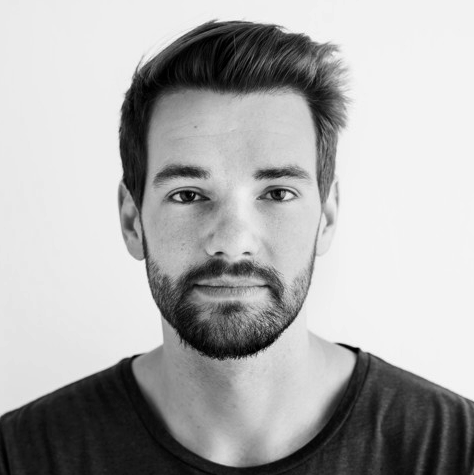

In [5]:
 test_image = cv2.imread('testimage.png')
#cv2_imshow(test_image)
gray_image  = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

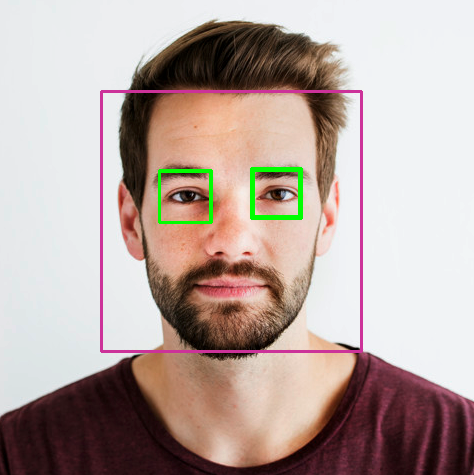

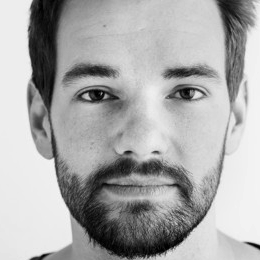

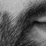

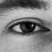

In [28]:
# read all faces

faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

cropped_image_faces = []  # only one in this case
cropped_image_eyes = [] #only two for the one face

for (x,y,w,h) in faces:
  #we now have a array of faces, lets go one by one
  cv2.rectangle(test_image, (x, y), (x+w, y+h), (153,50,204), 2 )
  cv2_imshow(test_image)
  cropped_image_face = gray_image[x:x+w,  y:y+h] # Crop from {x, y, w, h } => {0, 0, 300, 400}
  cv2_imshow(cropped_image_face)
  cropped_image_faces.append(cropped_image_face)
  #let's find out eyes inside these faces
  #this face is our region of interest for eyes
  roi_gray = gray_image[x:x+w,y:y+h]
  roi_color = test_image[x:x+w,y:y+h]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    #cv2_imshow(test_img)
    cv2_imshow(roi_gray[ex:ex+ew , ey:ey+eh])
    cropped_image_eyes.append(roi_gray[ex:ex+ew , ey:ey+eh])

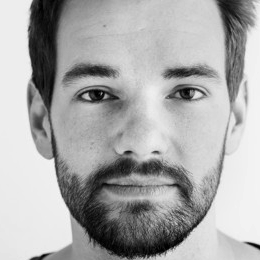

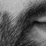

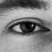

In [25]:
for face in cropped_image_faces:
  cv2_imshow(face)
for eye in cropped_image_eyes:
  cv2_imshow(eye)

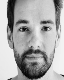

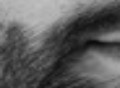

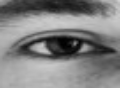

In [26]:
resized_faces = []
#let's resize now
for face in cropped_image_faces:
  resized_faces.append(cv2.resize(face, (64, 80)))

resized_eyes = []
#let's resize now
for eye in cropped_image_eyes:
  resized_eyes.append(cv2.resize(eye, (120, 88)))


# now all are resized

for face in resized_faces:
  cv2_imshow(face)
for eye in resized_eyes:
  cv2_imshow(eye)
 